In [16]:
import os
import matplotlib.pyplot as plt
import cv2
import face_recognition

In [2]:
directory = 'example'

In [3]:
actual = []
samples = []
image_names = []
for i in os.listdir(directory):
    image_path = os.path.join(directory, i)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    detected_locations = face_recognition.face_locations(image)
    detected_encodings = face_recognition.face_encodings(image, detected_locations)
    if i == 'actual.JPG':
        actual.append(detected_encodings)
    else:
        samples.append(detected_encodings)
        image_names.append(i)

In [4]:
for i in range(len(samples)):
    matches = face_recognition.compare_faces(known_face_encodings=actual[0],
                                             face_encoding_to_check=samples[i][0],
                                             tolerance=0.5)
    print(image_names[i], matches[0])

1.JPG False
10.JPG False
2.JPG False
3.JPG False
4.JPG False
5.JPG False
6.JPG True
7.JPG False
8.JPG False
9.JPG False


In [9]:
eye_model = cv2.CascadeClassifier('models/haarcascades/haarcascade_eye_tree_eyeglasses.xml')

In [115]:
image_path = os.path.join(directory, '3.JPG')
image = cv2.imread(image_path)
detected_locations = face_recognition.face_locations(image)
gray_frame = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
single_face_location = detected_locations[0]
face_image = gray_frame[single_face_location[0]:single_face_location[2], single_face_location[3]: single_face_location[1]]
eyes = eye_model.detectMultiScale(face_image, 1.1, 3)

In [116]:
single_face_location

(98, 184, 253, 29)

In [117]:
face_image.shape

(155, 155)

In [118]:
eye_1 = eyes[0]
eye_2 = eyes[1]
# Centers must be (x, y) coordinates. note that eyes location are in (x, y, w, h) format instead
eye_1_center_x = (eye_1[0] + eye_1[2]) / 2
eye_1_center_y = (eye_1[1] + eye_1[3]) / 2
eye_2_center_x = (eye_2[0] + eye_2[2]) / 2
eye_2_center_y = (eye_2[1] + eye_2[3]) / 2
# Must remember to rescale back to full small image frame
eye_1_center = [int(eye_1_center_x + single_face_location[3]), int(eye_1_center_y + single_face_location[0])]
eye_2_center = [int(eye_2_center_x + single_face_location[3]), int(eye_2_center_y + single_face_location[0])]
# Scale back to original image size
eye_1_center[0] = int(eye_1_center[0] // 1)
eye_2_center[0] = int(eye_2_center[0] // 1)
eye_1_center[1] = int(eye_1_center[1] // 1)
eye_2_center[1] = int(eye_2_center[1] // 1)
# Draw eyes
cv2.circle(image, tuple(eye_1_center), 5, (0, 255, 0), 2)
cv2.circle(image, tuple(eye_2_center), 5, (0, 255, 0), 2)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [119]:
eye_1 = eyes[0]
eye_2 = eyes[1]
# Centers must be (x, y) coordinates. note that eyes location are in (x, y, w, h) format instead
eye_1_center_x = eye_1[0] + (eye_1[2] / 2) 
eye_1_center_y = eye_1[1] + (eye_1[3] / 2) 

eye_2_center_x = eye_2[0] + (eye_2[2] / 2)
eye_2_center_y = eye_2[1] + (eye_2[3] / 2) 

In [120]:
cv2.rectangle(face_image, (eye_1[0], eye_1[1]), (eye_1[0] + eye_1[2], eye_1[1] + eye_1[3]), (0, 0, 255), 2)
cv2.rectangle(face_image, (eye_2[0], eye_2[1]), (eye_2[0] + eye_2[2], eye_2[1] + eye_2[3]), (0, 0, 255), 2)
# Draw eyes
cv2.circle(face_image, tuple([int(eye_1_center_x), int(eye_1_center_y)]), 2, (0, 255, 0), 2)
cv2.circle(face_image, tuple([int(eye_2_center_x), int(eye_2_center_y)]), 5, (0, 255, 0), 2)

array([[ 76,  76,  79, ...,  83,  83,  84],
       [ 79,  78,  80, ...,  83,  84,  84],
       [ 83,  80,  82, ...,  84,  84,  84],
       ...,
       [255, 255, 255, ..., 254, 254, 255],
       [255, 255, 255, ..., 254, 254, 255],
       [255, 255, 255, ..., 254, 254, 255]], dtype=uint8)

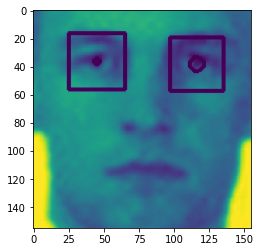

In [121]:
plt.imshow(face_image)